In [1]:
import pandas as pd 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
%matplotlib inline

In [7]:
cropped_image_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/pub_dataset_final/test/images/liebre15_6.png"
cropped_label_path = "/gws/nopw/j04/ai4er/users/kmgreen/data/Publication_data/pub_dataset_final/test/labels/liebre15_6.txt"

In [8]:
truth_image = Image.open(cropped_image_path)

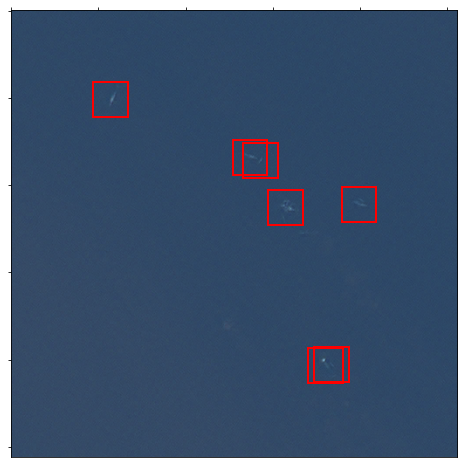

In [13]:
fig, ax = plt.subplots(figsize = (8,12))
ax.xaxis.tick_top()
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.imshow(truth_image)

boxes = pd.read_csv(cropped_label_path, sep=" ", header=None)
boxes

for i in range(0,boxes.shape[0]):
    x = (boxes[1][i] - boxes[3][i]*0.5)*truth_image.size[0]
    y = (boxes[2][i] - boxes[4][i]*0.5)*truth_image.size[1]
    w = boxes[3][i] * truth_image.size[0]
    h = boxes[4][i] * truth_image.size[1]
    ax.add_patch(patches.Rectangle((x,y),w,h, fill=False, edgecolor='red', lw=2))
    
plt.savefig('pub_mistakes.png', dpi=300)
plt.show()

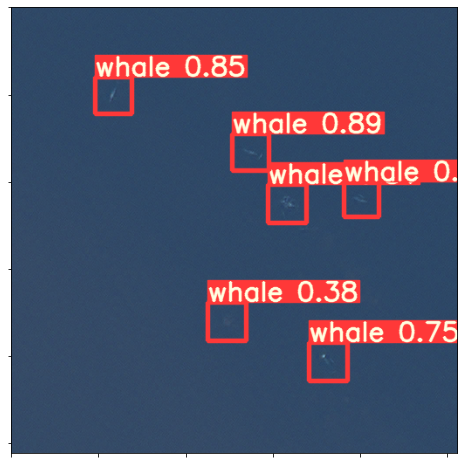

In [14]:
fig, ax = plt.subplots(figsize = (8,12))
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
test_image_path = '/home/users/kmgreen/Code/yolov5/runs/detect/pub_fullaugs/liebre15_6.png'
test_image = Image.open(test_image_path)
plt.imshow(test_image)
plt.savefig('pub_mistakes_test.png', dpi=300)